# CAT 1 - NLP

1. Collect the documents (atleast 2) to be indexed.
2. Tokenize the text (convert each document into a list of tokens).
3. Implement linguistic preprocessing (apply normalization, stemming, lemmatization, etc)
4. Index the document with its frequency
5. Sort the list (with frequency of words or sequence of words)
6. Calculate the edit distance of any two words from the corpus.


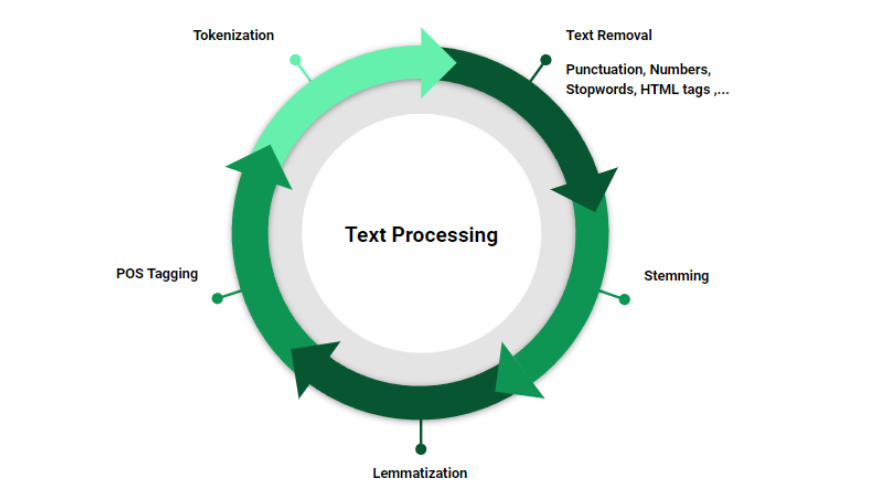


## Introduction

The **Docu-meant for Preprocessing** application is designed to assist in the preprocessing and analysis of textual documents. Built using Python's `tkinter` for the graphical user interface (GUI) and the Natural Language Toolkit (nltk) for text processing, this tool allows users to upload text documents, preprocess them through tokenization, stemming, and normalization, and analyze the content with functionalities like indexing and calculating edit distances.

## Features

1. **Upload Documents:** Users can upload multiple text files for preprocessing and analysis.
2. **Analyze Documents:** This feature allows users to preprocess the text documents and display tokenized text, normalized text, and sorted indexes based on term frequency.
3. **Calculate Edit Distance:** Users can calculate the Levenshtein distance between two words to measure their similarity.
4. **Save Preprocessed Documents:** Users can save the preprocessed documents for future use.
5. **Load Preprocessed Documents:** Users can load previously saved preprocessed documents to continue their analysis.

## Theoretical Concepts

### Tokenization

Tokenization is the process of breaking down text into smaller units called tokens, which can be words, phrases, or other meaningful elements. For example, tokenizing the sentence "Natural Language Processing is fascinating" would yield the tokens: ["Natural", "Language", "Processing", "is", "fascinating"].

### Stop Words Removal

Stop words are common words that typically do not carry significant meaning and are often removed from the text to focus on more informative terms. Examples of stop words include "is", "and", "the". For example, removing stop words from "Natural Language Processing is fascinating" results in ["Natural", "Language", "Processing", "fascinating"].

### Stemming

Stemming reduces words to their root form, which helps in normalizing text. For example, the words "running", "runner", and "ran" can be stemmed to the root word "run". The Porter Stemmer is a commonly used stemming algorithm.

### Normalization

Normalization involves converting text to a standard format, typically by converting all characters to lowercase and removing punctuation. For example, normalizing "Natural Language Processing is Fascinating!" results in "natural language processing is fascinating".

### Lemmatization

Lemmatization is similar to stemming but reduces words to their base or dictionary form, known as the lemma. It considers the context and converts words to their meaningful base form. For example, "running" and "ran" would be lemmatized to "run".

### Other preprocessing tools: 

These include converting all to lowercase, making digits to written text like 9 to nine, etc.

In [ ]:
# Let us first import the necessary libraries

import nltk  #Natural language tooklit and text preprocessing
from nltk.tokenize import word_tokenize #for tokenization
from nltk.stem import PorterStemmer #for steming
from nltk.corpus import stopwords #stop words are inconsequential words with little value in helping processors answer queries.  
from collections import defaultdict
import tkinter as tk #simple GUI 
from tkinter import filedialog, Text, Button, Label
import string #string processing

nltk.download('punkt')
nltk.download('stopwords')

In [47]:
import tkinter as tk
from tkinter import filedialog, Text, Button, Label
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict
import pickle
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# We define a class so as to introduce an object oriented concept for efficient programming
class TextAnalyzer:
    def __init__(self, master):
        self.master = master
        self.master.title("Docu-meant for preprocessing")
        self.documents = []
        self.preprocessed_docs = []
        self.setup_ui()

    def setup_ui(self): # this is the UI setup for our Tkinter application . See references at the end of the file
        self.upload_button = Button(self.master, text="Upload Documents", command=self.load_documents)
        self.upload_button.pack()
        #this is a button to upload documents
        
        self.analyze_button = Button(self.master, text="Analyze Documents", command=self.analyze_documents)
        self.analyze_button.pack()
        #this is the button for analyzing documents

        self.result_text = Text(self.master, height=20, width=80)
        self.result_text.pack()
        
        #edit distance buttons
        self.word1_label = Label(self.master, text="Enter first word for edit distance:")
        self.word1_label.pack()
        self.word1_entry = tk.Entry(self.master)
        self.word1_entry.pack()

        self.word2_label = Label(self.master, text="Enter second word for edit distance:")
        self.word2_label.pack()
        self.word2_entry = tk.Entry(self.master)
        self.word2_entry.pack()

        self.calculate_button = Button(self.master, text="Calculate Edit Distance", command=self.calculate_edit_distance)
        self.calculate_button.pack()
        
        #this is the button for STORING THE preprocessed file
        self.save_button = Button(self.master, text="Save Preprocessed Documents", command=self.save_preprocessed_documents)
        self.save_button.pack()
        
        #this is the button for LOADING the preprocessed file.
        self.load_button = Button(self.master, text="Load Preprocessed Documents", command=self.load_preprocessed_documents)
        self.load_button.pack()

    # function to load documents in the form of text files. It can be easily extended to docx file.
    # 
    def load_documents(self):
        file_paths = filedialog.askopenfilenames(filetypes=[("Text files", "*.txt")])
        self.documents = []
        for path in file_paths:
            with open(path, 'r', encoding='utf-8') as file:
                self.documents.append(file.read())
        self.result_text.insert(tk.END, f"Loaded {len(self.documents)} documents.\n")

    def preprocess(self, text):
        tokens = word_tokenize(text.lower())
        stop_words = set(stopwords.words('english'))
        ps = PorterStemmer()
        tokens = [ps.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
        return tokens

    def index_documents(self):
        index = defaultdict(lambda: defaultdict(int))
        for doc_id, doc in enumerate(self.documents):
            tokens = self.preprocess(doc)
            for token in tokens:
                index[token][doc_id] += 1
        return index

#     def sort_index(self, index):
#         sorted_index = {}
#         for term, postings in index.items():
#             sorted_index[term] = dict(sorted(postings.items(), key=lambda x: x[1], reverse=True))
#         return dict(sorted(sorted_index.items()))

    def sort_index(self, index):
        # First, calculate the frequency of each term
        term_frequencies = {term: sum(postings.values()) for term, postings in index.items()}

        # Then sort the index based on these frequencies
        sorted_index = dict(sorted(index.items(), key=lambda x: term_frequencies[x[0]], reverse=True))

        return sorted_index

    def analyze_documents(self):
        if hasattr(self, 'preprocessed_docs') and self.preprocessed_docs:
            preprocessed_docs = self.preprocessed_docs
        elif self.documents:
            preprocessed_docs = [self.preprocess(doc) for doc in self.documents]
        else:# if there is no document uploaded throw an error message.
            self.result_text.insert(tk.END, "Please upload documents or load preprocessed documents first.\n")
            return

        self.result_text.delete('1.0', tk.END)

        # Step 1: Tokenized text
        self.result_text.insert(tk.END, "1. Tokenized text:\n")
        for doc_id, doc in enumerate(preprocessed_docs):
            self.result_text.insert(tk.END, f"Document {doc_id + 1}: {doc[:50]}...\n\n")

        # Step 2: Linguistic preprocessing
        self.result_text.insert(tk.END, "\n2. After linguistic preprocessing (normalization, stemming, lemmatization):\n")
        for doc_id, doc in enumerate(preprocessed_docs):
            self.result_text.insert(tk.END, f"Document {doc_id + 1}: {doc[:50]}...\n\n")

        # Step 3: Index the document with its frequency
        self.result_text.insert(tk.END, "\n3. Document index with frequencies:\n")
        index = defaultdict(lambda: defaultdict(int))
        for doc_id, doc in enumerate(preprocessed_docs):
            for token in doc:
                index[token][doc_id] += 1
        for term, postings in list(index.items())[:20]:
            self.result_text.insert(tk.END, f"{term}: {postings}\n")
        self.result_text.insert(tk.END, "...\n")

#         # Step 4: Sort the frequencies
#         self.result_text.insert(tk.END, "\n4. Sorted index by frequency:\n")
#         sorted_index = self.sort_index(index)
#         for term, postings in list(sorted_index.items())[:20]:
#             self.result_text.insert(tk.END, f"{term}: {postings}\n")
#         self.result_text.insert(tk.END, "...\n")

        # Step 4: Sort the frequencies
        self.result_text.insert(tk.END, "\n4. Sorted index by frequency:\n")
        sorted_index = self.sort_index(index)
        for term, postings in list(sorted_index.items())[:20]:
            self.result_text.insert(tk.END, f"{term}: {postings}\n")
        self.result_text.insert(tk.END, "...\n")

    # This is a hardcoded function to calculate Levenshtein distance
    def levenshtein_distance(self, s1, s2):
        # Ensure that the first string (s1) is longer than or equal to the second string (s2)
        if len(s1) < len(s2):
            return self.levenshtein_distance(s2, s1)

        # If the second string (s2) is empty, the distance is the length of the first string (s1)
        if len(s2) == 0:
            return len(s1)

        # Initialize the previous row of the distance matrix
        previous_row = range(len(s2) + 1)

        # Iterate over each character in the first string (s1)
        for i, c1 in enumerate(s1):
            # Initialize the current row with the first element being i + 1
            current_row = [i + 1]

            # Iterate over each character in the second string (s2)
            for j, c2 in enumerate(s2):
                # Calculate the cost of insertion, deletion, and substitution
                insertions = previous_row[j + 1] + 1  # Cost of inserting a character
                deletions = current_row[j] + 1        # Cost of deleting a character
                substitutions = previous_row[j] + (c1 != c2)  # Cost of substituting a character

                # Take the minimum of the three costs and add it to the current row
                current_row.append(min(insertions, deletions, substitutions))

            # Move to the next row by setting previous_row to the current row
            previous_row = current_row

        # The last element of the last row is the Levenshtein distance
        return previous_row[-1]


    def calculate_edit_distance(self):
        word1 = self.word1_entry.get().lower()
        word2 = self.word2_entry.get().lower()

        if hasattr(self, 'preprocessed_docs') and self.preprocessed_docs:
            all_words = set(word for doc in self.preprocessed_docs for word in doc)
        elif self.documents:
            all_words = set(word for doc in self.documents for word in self.preprocess(doc))
        else:
            self.result_text.insert(tk.END, "Please upload documents or load preprocessed documents first.\n")
            return
        
        #Validation for not typing words that are inside the document.
        if word1 not in all_words and word2 not in all_words:
            self.result_text.insert(tk.END, f"\nError: Both '{word1}' and '{word2}' are not present in the documents.\n")
        elif word1 not in all_words:
            self.result_text.insert(tk.END, f"\nError: '{word1}' is not present in the documents.\n")
        elif word2 not in all_words:
            self.result_text.insert(tk.END, f"\nError: '{word2}' is not present in the documents.\n")
        else:
            distance = self.levenshtein_distance(word1, word2)
            self.result_text.insert(tk.END, f"\nEdit distance between '{word1}' and '{word2}': {distance}\n")

#UNCOMMENT THIS TO SAVE THE PREPROCESSED FILE AS A PICKLE FILE OTHERWISE BY DEFAULT IT IS SET TO TXT            
            
#     def save_preprocessed_documents(self):
#         if not self.documents and not self.preprocessed_docs:
#             self.result_text.insert(tk.END, "No documents to save. Please upload and preprocess documents first.\n")
#             return

#         file_path = filedialog.asksaveasfilename(defaultextension=".pkl", filetypes=[("Pickle files", "*.txt")])
#         if file_path:
#             if self.preprocessed_docs:
#                 preprocessed_docs = self.preprocessed_docs
#             else:
#                 preprocessed_docs = [self.preprocess(doc) for doc in self.documents]
#             with open(file_path, 'wb') as f:
#                 pickle.dump(preprocessed_docs, f)
#             self.result_text.insert(tk.END, f"Preprocessed documents saved to {file_path}\n")

#     def load_preprocessed_documents(self):
#         file_path = filedialog.askopenfilename(filetypes=[("Pickle files", "*.pkl")])
#         if file_path:
#             with open(file_path, 'rb') as f:
#                 self.preprocessed_docs = pickle.load(f)
#             self.result_text.insert(tk.END, f"Loaded {len(self.preprocessed_docs)} preprocessed documents from {file_path}\n")



    def save_preprocessed_documents(self):
        if not self.documents and not self.preprocessed_docs:
            self.result_text.insert(tk.END, "No documents to save. Please upload and preprocess documents first.\n")
            return

        file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
        if file_path:
            if self.preprocessed_docs:
                preprocessed_docs = self.preprocessed_docs
            else:
                preprocessed_docs = [self.preprocess(doc) for doc in self.documents]
            
            with open(file_path, 'w', encoding='utf-8') as f:
                for doc in preprocessed_docs:
                    f.write(' '.join(doc) + '\n')
            
            self.result_text.insert(tk.END, f"Preprocessed documents saved to {file_path}\n")

    def load_preprocessed_documents(self):
        file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if file_path:
            with open(file_path, 'r', encoding='utf-8') as f:
                self.preprocessed_docs = [line.strip().split() for line in f]
            self.result_text.insert(tk.END, f"Loaded {len(self.preprocessed_docs)} preprocessed documents from {file_path}\n")


# Main application setup
root = tk.Tk()
app = TextAnalyzer(root)
root.mainloop()

[nltk_data] Downloading package punkt to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## Example Workflow

1. **Upload Documents:** User uploads text files containing sentences or paragraphs.
2. **Tokenization and Normalization:** The text is tokenized into words, converted to lowercase, and stripped of punctuation.
3. **Stemming:** The tokens are reduced to their root forms.
4. **Indexing and Frequency Count:** The preprocessed tokens are indexed, and their frequencies are calculated.
5. **Sort Index:** The index is sorted based on term frequencies.
6. **Edit Distance Calculation:** User inputs two words to compute their edit distance, which measures the similarity between the words.

## Summary

The **Docu-meant for Preprocessing** application offers a  set of tools for text preprocessing and analysis. By utilizing tokenization, stop words removal, stemming, and normalization, users can effectively preprocess their textual data. The application also provides functionality for calculating edit distances between words, saving, and loading preprocessed documents, making it a versatile tool for text analysis tasks.



### PS


Tasks like text classification do not generally need stop words as the other words present in the dataset are more important and give the general idea of the text. So, we generally remove stop words in such tasks.

# SAMPLE OUTPUTS

## GUI TKINTER
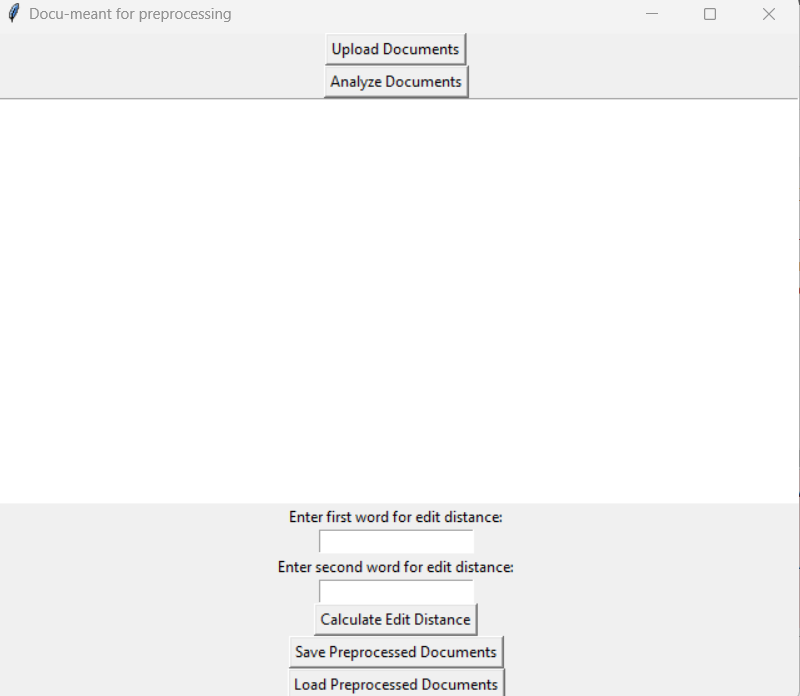

## Loaded Text File

### This is a dummy text just to run test case

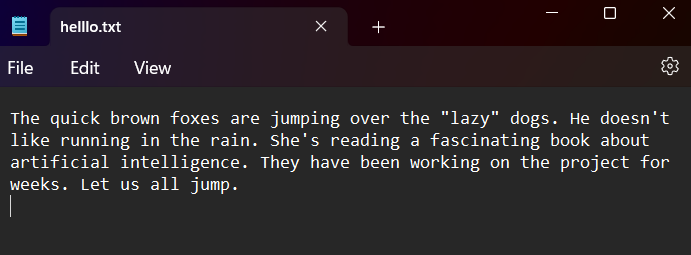

### Uploaded and analysed 

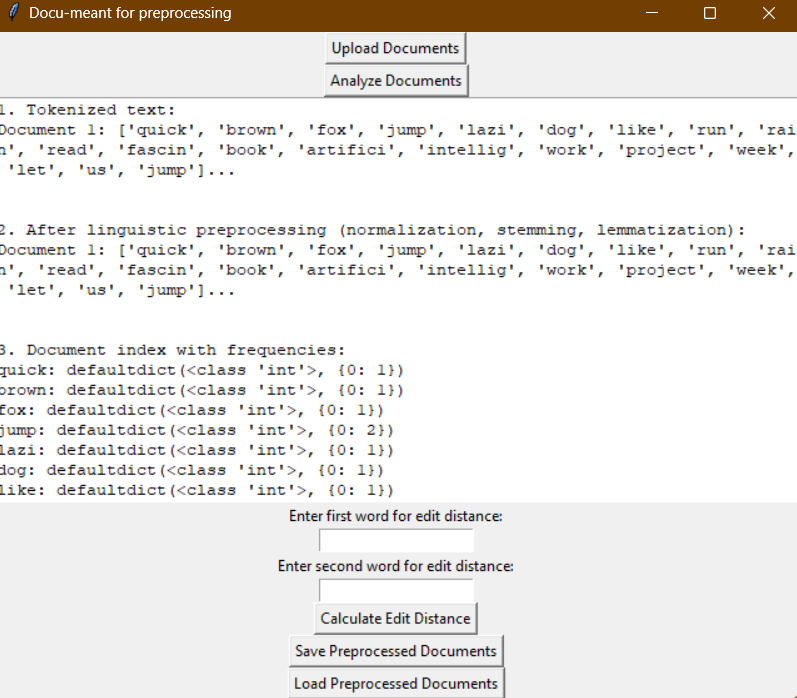

### EDIT DISTANCE CALCULATION

#### Checking for validation
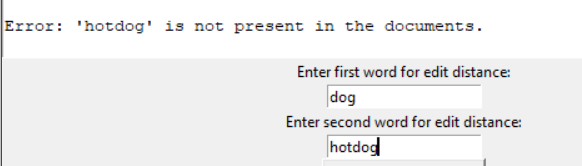

#### Otherwise give the output

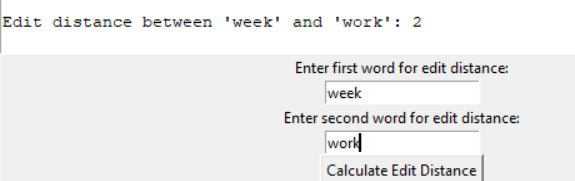

### After storing the preprocessed document:

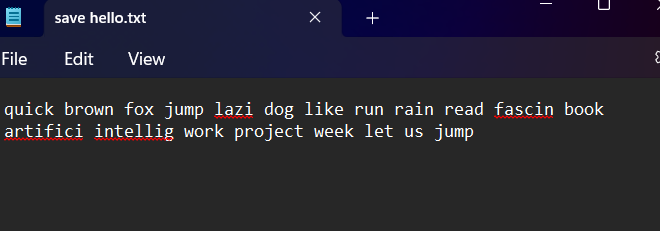

# References:

1. For storage: https://www.researchgate.net/figure/Preprocessing-Storage-and-Processing-of-Texts-in-Text-Mining_fig2_215624034
2. Understanding preprocessing: http://text-processing.com/demo/stem/
3. Stemming code: https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/
4. Text processing further: https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
5. Text processing further: https://towardsdatascience.com/all-you-need-to-know-about-text-preprocessing-for-nlp-and-machine-learning-bc1c5765ff67
6. How to make simple gui application in python: https://www.geeksforgeeks.org/python-gui-tkinter/